In [1]:
import numpy as np

In [27]:
N=128
Ntaps = 7
Nzoom = 5
Ntot = N*Ntaps
win_t = np.pi*(np.arange(Ntot) - Ntot/2)/N
win = np.sin(win_t)/win_t
win[win_t==0]=1.0           

/tmp/ipykernel_153/3661370217.py:5: RuntimeWarning: invalid value encountered in divide
  win = np.sin(win_t)/win_t


In [68]:
def bin10(data):
    ## first get pfb samples
    s10list = []
    for i in range(len(data)//N-Ntaps):
        pfb_samples = np.fft.rfft((data[i*N:(i+Ntaps)*N]*win).reshape((Ntaps,N)).mean(axis=0))
        s10list.append(pfb_samples[10])
    s10 = np.array(s10list)
    ps = np.mean(np.abs(s10**2))
    tmp=s10.reshape((-1,5))
    #print (tmp.shape)
    pfb_zoom = np.fft.fft(tmp)
    zoomps = np.abs(pfb_zoom**2).mean(axis=0)/25
    #now zoomps
    return ps,zoomps
        
    

In [69]:
x=np.arange((100+Ntaps)*N)
pkl = []
pkzoom = []
omegas=np.linspace (8,12,100)
for omega in omegas:
    data=np.sin(omega*x/N*2*np.pi)    
    pk,pkz=bin10(data)
    pkl.append(pk)
    pkzoom.append (pkz)
pkzoom=np.array(pkzoom)

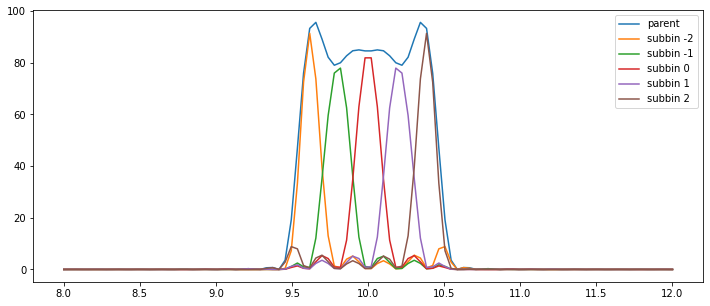

In [70]:
plt.figure(figsize=(12,5))
plt.plot(omegas,pkl,label='parent')
for i in [-2,-1,0,1,2]:
    plt.plot(omegas,pkzoom[:,i],label='subbin '+str(i))
plt.legend()